# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

units="metric"


Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    #city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    # pause to avoid rate limiting

    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | balnearia
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | lerwick
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | djenne
Processing Record 7 of Set 1 | san antonio de pale
Processing Record 8 of Set 1 | tacna
Processing Record 9 of Set 1 | egilsstadir
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | ghadamis
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | ketchikan
Processing Record 15 of Set 1 | kenai
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | mwinilunga
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | gonabad
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | ferkessedougou
Processing Record 22 of Set 1 | grytvi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          171
Lat           171
Lng           171
Max Temp      171
Humidity      171
Cloudiness    171
Wind Speed    171
Country       171
Date          171
dtype: int64

In [5]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,balnearia,-31.0088,-62.6673,13.04,36,7,0.88,AR,1720724200
1,hamilton,39.1834,-84.5333,31.25,53,0,2.06,US,1720723615
2,port-aux-francais,-49.3500,70.2167,4.87,88,99,15.84,TF,1720723821
3,lerwick,60.1545,-1.1494,12.00,79,98,6.68,GB,1720723870
4,anadyr,64.7500,177.4833,4.28,86,75,4.00,RU,1720723861
5,djenne,13.9061,-4.5533,26.95,61,100,11.23,ML,1720724200
6,san antonio de pale,-1.4014,5.6325,22.84,81,100,4.91,GQ,1720723859
7,tacna,-18.0056,-70.2483,15.11,59,0,1.54,PE,1720724201
8,egilsstadir,65.2653,-14.3948,18.95,45,98,9.77,IS,1720723897
9,adamstown,-25.0660,-130.1015,21.59,90,100,12.48,PN,1720723823


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,balnearia,-31.0088,-62.6673,13.04,36,7,0.88,AR,1720724200
1,hamilton,39.1834,-84.5333,31.25,53,0,2.06,US,1720723615
2,port-aux-francais,-49.3500,70.2167,4.87,88,99,15.84,TF,1720723821
3,lerwick,60.1545,-1.1494,12.00,79,98,6.68,GB,1720723870
4,anadyr,64.7500,177.4833,4.28,86,75,4.00,RU,1720723861


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

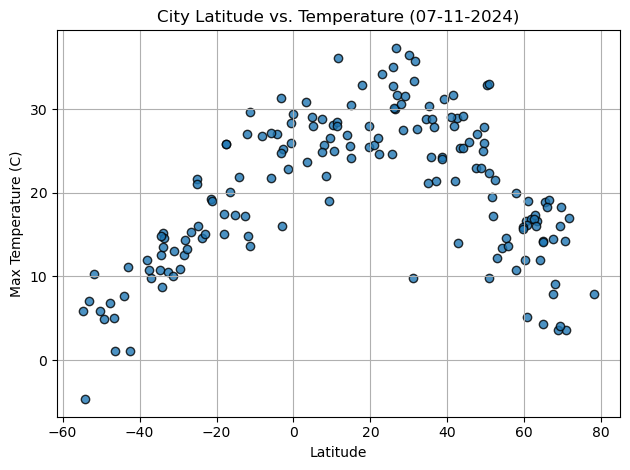

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],alpha=.8, edgecolors="k")

date=datetime.now()
date=date.strftime("%m-%d-%Y")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

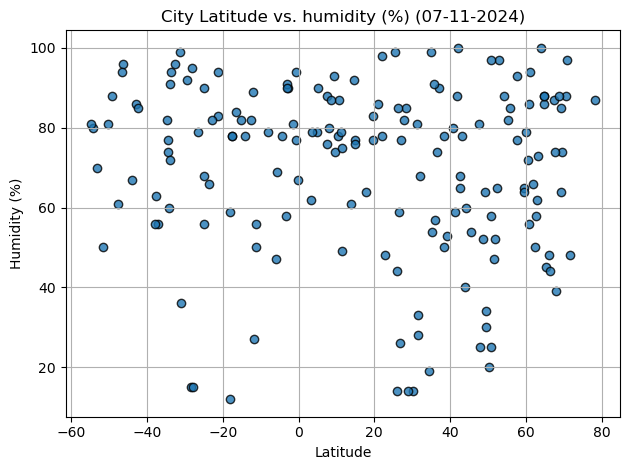

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],alpha=.8, edgecolors="k")

date=datetime.now()
date=date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. humidity (%) ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

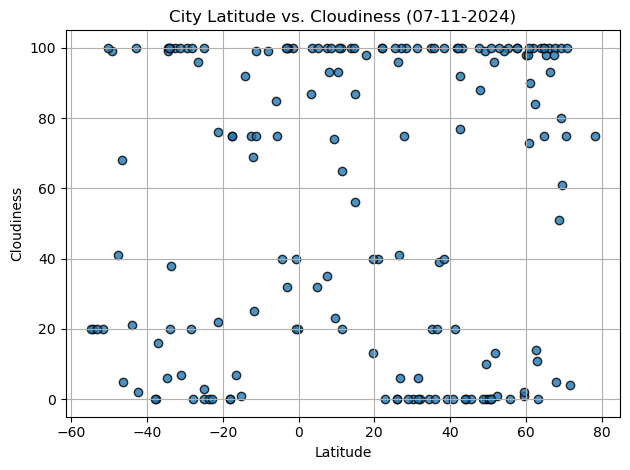

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],alpha=.8, edgecolors="k")

date=datetime.now()
date=date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

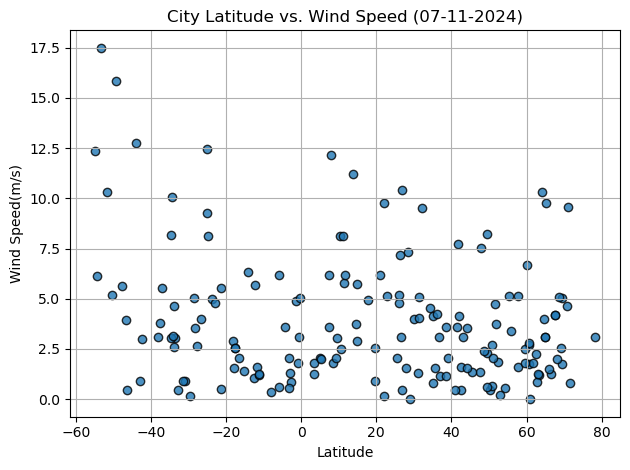

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],alpha=.8, edgecolors="k")

date=datetime.now()
date=date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

#(slope, intercept,rvalue,pvalue,stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hamilton,39.1834,-84.5333,31.25,53,0,2.06,US,1720723615
3,lerwick,60.1545,-1.1494,12.00,79,98,6.68,GB,1720723870
4,anadyr,64.7500,177.4833,4.28,86,75,4.00,RU,1720723861
5,djenne,13.9061,-4.5533,26.95,61,100,11.23,ML,1720724200
8,egilsstadir,65.2653,-14.3948,18.95,45,98,9.77,IS,1720723897


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) <0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,balnearia,-31.0088,-62.6673,13.04,36,7,0.88,AR,1720724200
2,port-aux-francais,-49.3500,70.2167,4.87,88,99,15.84,TF,1720723821
6,san antonio de pale,-1.4014,5.6325,22.84,81,100,4.91,GQ,1720723859
7,tacna,-18.0056,-70.2483,15.11,59,0,1.54,PE,1720724201
9,adamstown,-25.0660,-130.1015,21.59,90,100,12.48,PN,1720723823


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6914379695124723


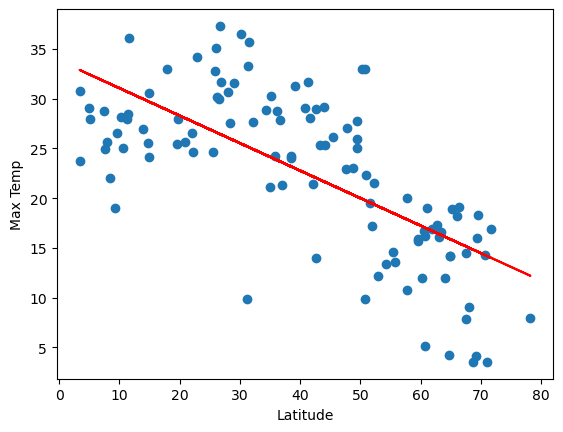

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (0,-20), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f'The r-value is: {rvalue}')

The r-value is: 0.8791209905030779


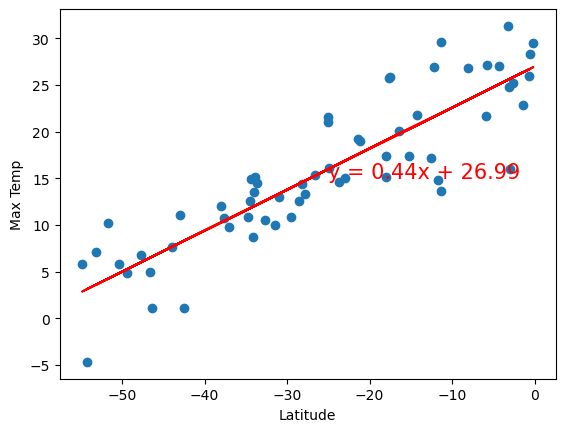

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (-25,15), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.042888082013700424


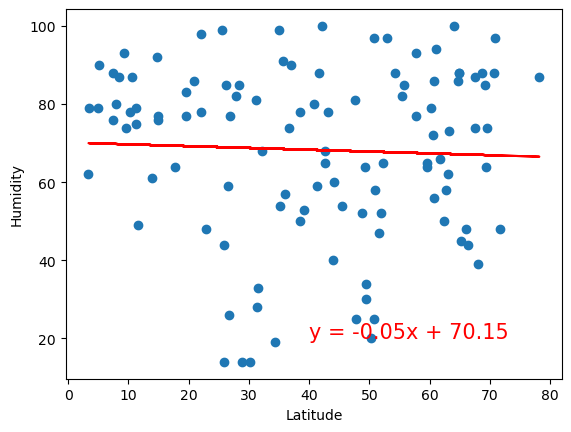

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (40,20), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f'The r-value is: {rvalue}')

The r-value is: -0.04433660564036374


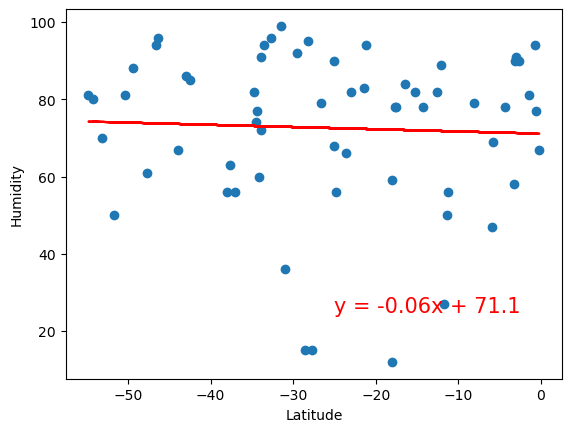

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (-25,25), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.003404881196493583


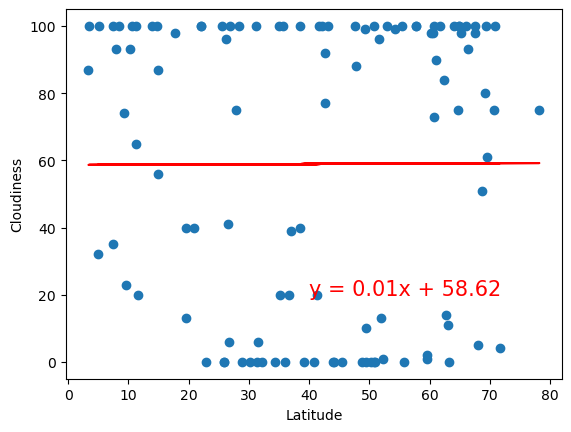

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (40,20), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f'The r-value is: {rvalue}')

The r-value is: 0.1713102676896603


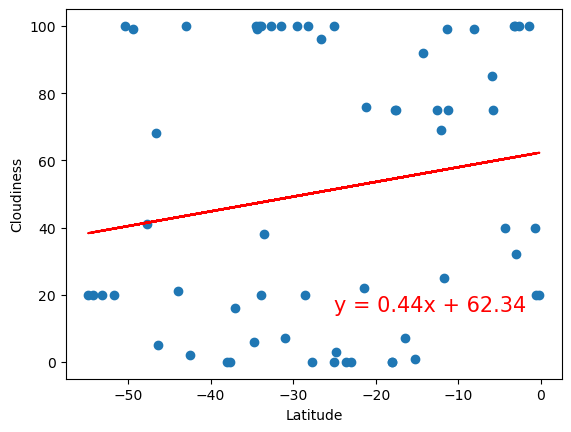

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (-25,15), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.1742395769754843


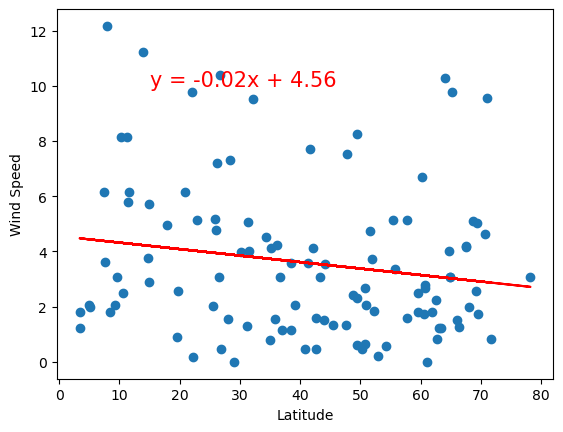

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (15,10), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f'The r-value is: {rvalue}')

The r-value is: -0.47350154680939655


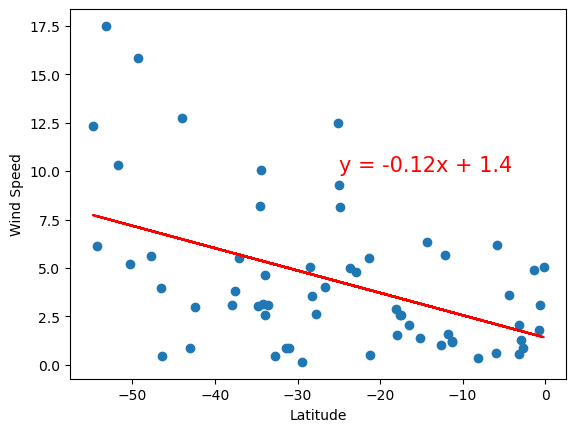

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (-25,10), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f'The r-value is: {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE